<a href="https://colab.research.google.com/github/kalinharikumar/Industrial-Copper-Modeling/blob/main/copper_pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Industrial Copper Modeling**

In [38]:
df=pd.read_csv(r"E:\Copper Modelling\Copper_dataset.csv")

df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


# ***Preprocessing & EDA***(4c's of data cleaning: correcting, completing, creating & converting)

In [34]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [39]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

# Data Cleaning

Removing rubbish values that are present in the column ‘Material_Ref’ which starts with ‘00000’ value which are converted into "unknown".

Converting necessary data types and replacing errors with Nan
what error ='coerce' do?

If the error argument is passed as "coerce" , then invalid parsing will be set as NaN

strip():- This method is used to delete all the leading and trailing characters mentioned in its argument.

lstrip():- This method is used to delete all the leading characters mentioned in its argument.

rstrip():- This method is used to delete all the trailing characters mentioned in its argument.

In [40]:
# material reference columns has many null values considering it as important, filling the null value with 'unknown'
df.material_ref.fillna('unknown', inplace=True)

# Since our dataset is huge the null value counts present on other features are less than 1 % hence dropping it
df.dropna(inplace=True)

Changing dtypes in df(if any found)

In [41]:
#converting date
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

#strip the 0 in material reference
df['material_ref'] = df['material_ref'].str.lstrip('0')

#converting to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [43]:
df.dropna(inplace=True)

In [44]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

## filling NaN values using fillna

In [45]:
df.shape

(181631, 14)

In [46]:
df.nunique()

id               181631
item_date           250
quantity tons    181631
customer           1167
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        26
selling_price      9795
dtype: int64

In [48]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


# Finding and treating outliers and skewness in the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

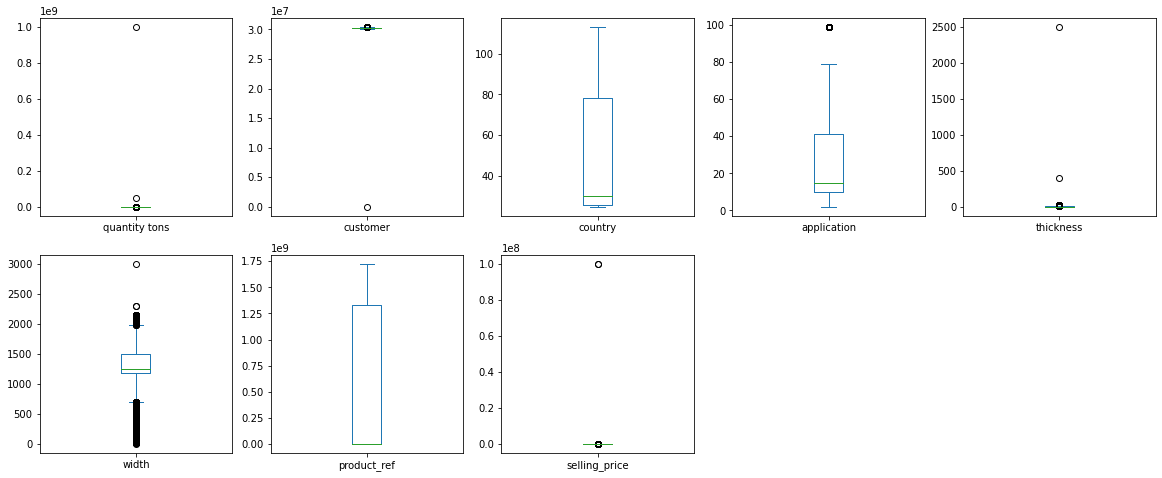

In [49]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))
plt.show

In [50]:
#skewness
df.skew()

quantity tons    424.641723
customer        -149.089203
country            0.753584
application        0.724324
thickness        303.471592
width              0.374845
product_ref        1.014983
selling_price    301.353247
dtype: float64

# Five number Summary for detecting Outliers

Finding the Min and Max boundary with IQR

Calculate the Interquartile Range IQR = Q3 — Q1

Q1= 0.25 quantile, 
Q3 = 0.75 quantile

Min or lower boundary = Q1–1.5 * IQR and getting Max or upper boundary = Q3 + 1.5 * IQR.

In [12]:
# Calculating Min and max boundaries

update_columns=['quantity tons','thickness','width','selling_price']

for i in update_columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  print('\n',i,' lower limit=',Q1-1.5 * IQR,' upper limit=',Q3+1.5 * IQR)


 quantity tons  lower limit= -73.31517328000001  upper limit= 151.44608370000003

 thickness  lower limit= -2.75  upper limit= 6.449999999999999

 width  lower limit= 700.0  upper limit= 1980.0

 selling_price  lower limit= 243.0  upper limit= 1379.0


In [51]:
update_columns=['quantity tons','thickness','width','selling_price']

for i in update_columns:
  Q1=df[i].quantile(0.05)
  Q3=df[i].quantile(0.95)
  print('\n',i,' lower limit=',Q1,' upper limit=',Q3)


 quantity tons  lower limit= 2.891169122  upper limit= 309.4858216

 thickness  lower limit= 0.45  upper limit= 8.0

 width  lower limit= 932.0  upper limit= 1950.0

 selling_price  lower limit= 521.0  upper limit= 1182.0


# Winsorize
The winsorize module in Python is used to limit the extreme values in a dataset, or to Winsorize the dataset. 
This is done by replacing the extreme values with the values at a certain percentile of the dataset. 

For example, if you want to Winsorize a dataset at the 95th percentile, then all values above the 95th percentile will be replaced with the value at the 95th percentile. This is done to reduce the influence of outliers on the dataset.

In [52]:
from scipy.stats.mstats import winsorize

<function matplotlib.pyplot.show(close=None, block=None)>

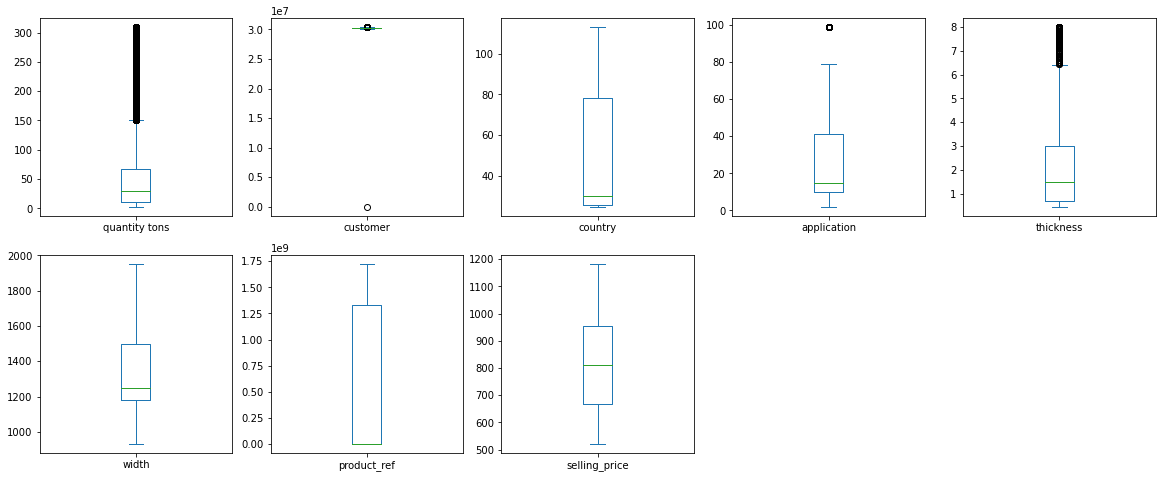

In [53]:
update_columns=['quantity tons','thickness','width','selling_price']

#Now, we winsorize the clumn data by 10% i.e. we winsorize 5% of the highest values and 5% of the lowest value of the array:
for i in update_columns:
  df[i]=winsorize(df[i],(0.05,0.05))

df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))
plt.show

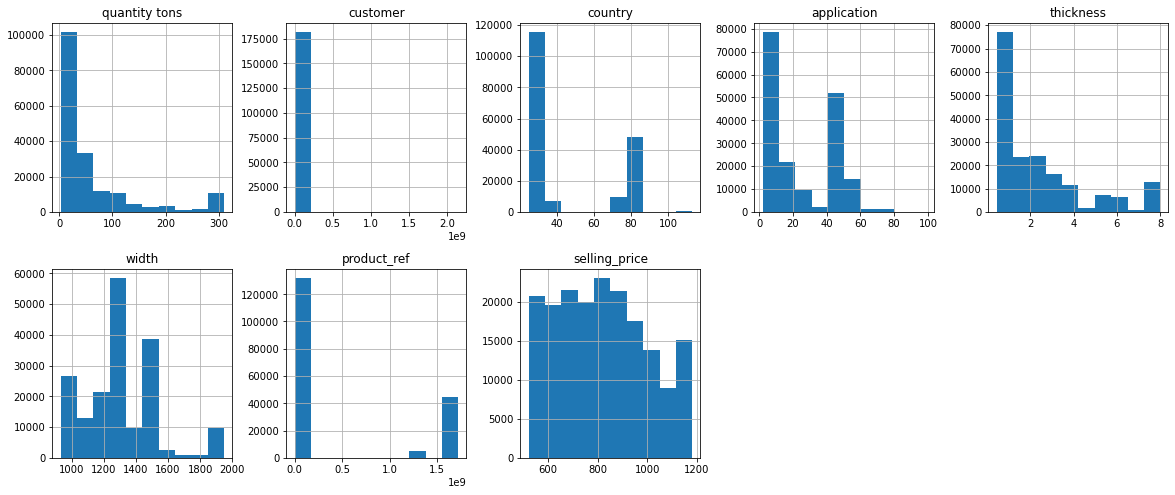

In [16]:
df.hist(layout=(2,5),figsize=(20,8))
plt.show()

In [54]:
df.skew()

quantity tons      2.070813
customer        -149.089203
country            0.753584
application        0.724324
thickness          1.383609
width              0.852285
product_ref        1.014983
selling_price      0.241438
dtype: float64

In [55]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,181631.000000,1.816310e+05,181631.000000,181631.000000,181631.000000,181631.000000,1.816310e+05,181631.000000
mean,61.171460,3.023251e+07,44.893201,25.615974,2.359188,1300.925839,4.740398e+08,820.212440
std,78.968123,1.005626e+05,24.404303,17.753821,2.158919,234.748734,7.175426e+08,185.449252
min,2.891151,1.245800e+04,25.000000,2.000000,0.450000,932.000000,6.117280e+05,521.000000
25%,10.968015,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,669.000000
50%,30.363953,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,812.000000
75%,67.161869,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,953.000000
max,309.486196,3.040818e+07,113.000000,99.000000,8.000000,1950.000000,1.722208e+09,1182.000000


## **Feature Engineering**

 From the columns order date and delivery date, we're creating a new feature "delivery_period" for calculating the number of days taken for delivering the product.

In [57]:
df['delivery_period']=(df['item_date']-df['delivery date']).abs().dt.days
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_period
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,309.486196,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,309.486196,30153963.0,30.0,Won,WI,28.0,0.45,952.0,S0380700,628377,2021-01-01,644.33,90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,309.486196,30211560.0,28.0,Won,W,10.0,4.00,1950.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31


In [68]:
from sklearn.preprocessing import LabelEncoder

cat_col=['country','status','customer','item type','application','product_ref']
le = LabelEncoder()

for i in cat_col:
    print(i)
    print( df[i].unique())
    df[i] = le.fit_transform(df[i])
    print("Labels: ",df[i].unique())
    print('\n')

country
[ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
Labels:  [ 3  0  4  5  6 10  2  9 16 11  1  7  8 13 12 15 14]


status
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
Labels:  [7 0 6 1 2 8 5 4 3]


customer
[30156308. 30202938. 30153963. ... 30349515. 30284694. 30161559.]
Labels:  [ 51 288  39 ... 952 687  97]


item type
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
Labels:  [5 6 3 1 2 0 4]


application
[10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
Labels:  [ 4 17 12 21  5  2 14 19 18 10 11  6  7 23 13  8 16  9 24 28  1 29  0  3
 15 26 27 22 20 25]


product_ref
[1670798778 1668701718     628377     640665     611993 1668701376
  164141591 1671863738 1332077137     640405 1693867550 1665572374
 1282007633 1668701698     628117 1690738206     628112     640400
 1671876026  164336407  164337175 1668701725 166557

# Checking Correlation between the variables 

## Regression Model

Checking for best accuracy models for selling price prediction.

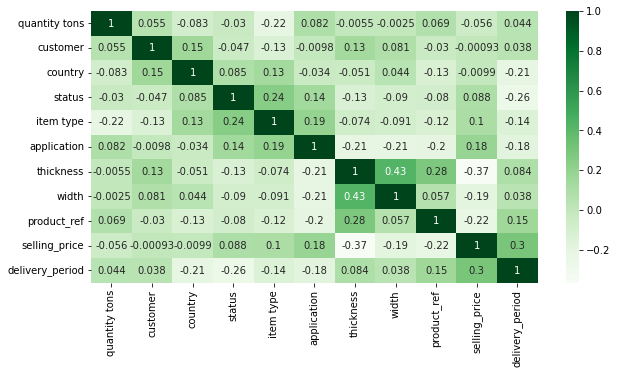

In [69]:
#understanding correlation with feautures and target
plt.figure(figsize=(10,5))
sns.heatmap(df.iloc[:,2: ].corr(),  annot=True,cmap="Greens")
plt.show()

# Observation

The Width and thickness are 43% postively correlated So we can use any 1 for our experimentation

Item type and Status is 24% postively correlated

Selling price and application is 18% postively correlated

The delivery period we calculated is 30% positively correlated to the target variable Selling price

Also the target variable selling price is 37% negatively correlated to Thickness 

In [70]:
df.dropna(inplace=True)

In [84]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_period
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,51,3,7,5,4,2.0,1500.0,DEQ1 S460MC,24,2021-07-01,854.0,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,309.486196,288,0,7,5,17,0.8,1210.0,104991,22,2021-04-01,1047.0,0


In [87]:
from sklearn.model_selection import train_test_split

x=df[['quantity tons','item type','country','application','thickness','width', 'product_ref','delivery_period']].values
y=df[['selling_price']].values

# Standarizing regression data 


In [88]:

# standard scaler -> StandardScaler() - -1 to 1 or MinMaxScaler() - 0 to 1

from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scaler = StandardScaler().fit(x) 

#saving pickle file for scaling
pickle.dump(scaler, open('Regression_scaling.pkl', 'wb'))

# transform training data
x = scaler.transform(x)

#spliting train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state= 42)


# Model Selection and Training

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [75]:
lis=[LinearRegression(),ElasticNet(),LassoLars(),DecisionTreeRegressor(), RandomForestRegressor()]

models=['LinearRegression','ElasticNet','LassoLars', 'DTR', 'RFR']
score=[]

for i in lis:
  i.fit(X_train, Y_train)

  Y_pred=i.predict(X_test)
    
  score.append( r2_score(Y_test, Y_pred))

In [76]:
score

[0.3060426205746406,
 0.27047813351864347,
 0.3056736140744696,
 0.75585962860378,
 0.8620004260192404]

In [77]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

Wall time: 7min 43s
Compiler : 143 ms
Parser   : 684 ms


{'n_neighbors': 4}

In [78]:
%%time

#KNN
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

model.fit(X_train, Y_train)  #fit the model
Y_pred=model.predict(X_test)

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))
models.append('KNeighborsRegressor')
score.append(r2_score(Y_test, Y_pred))

Mean squared error:  9884.292949543498
Mean absolute error:  65.57572751213515
R2 Score:  0.7139849459037642
Wall time: 10.4 s


In [79]:
%%time

#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
score.append(r2_score(Y_test, Y_pred))

importances=model.feature_importances_

for i,v in zip(['quantity tons','customer','item type','country','application','thickness','width', 'product_ref','delivery_period'], 
               importances):
  print('Feature:'',Score: ',(i,v))


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))
models.append('DecisionTreeRegressor')
score.append(r2_score(Y_test, Y_pred))

Feature:,Score:  ('quantity tons', 0.09133685850390849)
Feature:,Score:  ('customer', 0.026717700047011312)
Feature:,Score:  ('item type', 0.09103217558223202)
Feature:,Score:  ('country', 0.03955559930179045)
Feature:,Score:  ('application', 0.05757155704720465)
Feature:,Score:  ('thickness', 0.03466219511659971)
Feature:,Score:  ('width', 0.34016283990121127)
Feature:,Score:  ('product_ref', 0.3189610745000421)
Mean squared error:  8527.331440283395
Mean absolute error:  47.668735192924046
R2 Score:  0.7532504170364731
Wall time: 4.35 s
Parser   : 129 ms


# Random Forest Regressor

In [91]:
%%time

from sklearn.ensemble import RandomForestRegressor




model= RandomForestRegressor(n_estimators=10)

model.fit(X_train,Y_train)

Y_pred= model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))

models.append('RandomForestRegressor')
score.append(r2_score(Y_test, Y_pred))


Mean squared error:  5235.137846445758
Mean absolute error:  43.461938594629366
R2 Score:  0.8485143811503899
Wall time: 36.3 s
Parser   : 312 ms


In [81]:
%%time

#ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, criterion='friedman_mse', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=10, max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=4, random_state=53, 
                            verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None).fit(X_train, Y_train)
Y_pred=model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))
models.append('ExtraTreesRegressor')
score.append(r2_score(Y_test, Y_pred))

Mean squared error:  4732.4036233689885
Mean absolute error:  39.900618789930306
R2 Score:  0.8630616590126847
Wall time: 22min 24s


# Visualizing the scores

In [ ]:
plt.bar(models, score,
         color = "red")
 
plt.xlabel("Score")
plt.ylabel("Models")
plt.title("Scores of Regression models")
plt.show()

# Observation

From this dataset, " ExtraTreesRegressor " gives the best score. Hence considering it as a best model

# Pickle file

The pickle module in Python is used to serialize and deserialize a Python object structure. 

This means that you can convert a Python object into a byte stream that can be stored in a file, transmitted over a network, or saved to a database. 

When you need to use the object again, you can deserialize it back into a Python object.

Pickle is often used to save machine learning models, as it is a very efficient way to store and transmit large amounts of data. 

It can also be used to save other types of objects, such as dictionaries, lists, and functions.

In [92]:
#creating pickle files to save the trained models in a file

model = ExtraTreesRegressor(n_estimators=100, criterion='friedman_mse', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=10, max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=4, random_state=53, 
                            verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None).fit(X_train, Y_train)

model.fit(X_train, Y_train)                          

pickle.dump(model, open('Regression_Model.pkl', 'wb'))

# Classification Model

From the given Problem Statement filtering data points ignoring other statuses only keeping  WON & LOST STATUS values, 

 WON status is considered as Success and LOST status is considered as Failure.

from sklearn.preprocessing import LabelEncoder

cat_col=['country','status','customer','item type','application','product_ref'] 

le = LabelEncoder()

for i in cat_col:
  print(i)
  print(df[i].unique())
  df[i] = le.fit_transform(df[i])
  print(df[i].unique())
  print('\n')

In [93]:
#  From the encoded Label we get  7 as Won, 1 as Lost
cdf=df.loc[df["status"].isin([7,1])] 
cdf.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_period
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,51,3,7,5,4,2.00,1500.0,DEQ1 S460MC,24,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,309.486196,288,0,7,5,17,0.80,1210.0,104991,22,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,309.486196,39,4,7,6,12,0.45,952.0,S0380700,5,2021-01-01,644.33,90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,954,5,7,3,21,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,22,2021-01-01,768.00,90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,309.486196,397,3,7,5,4,4.00,1950.0,2_S275JR+AR-CL1,8,2021-03-01,577.00,31


In [94]:
print("Original Won lost Labels: ",cdf['status'].unique())

cdf['status'] = le.fit_transform(cdf['status'])
print("Label encoded Labels: ",cdf['status'].unique())

Original Won lost Labels:  [7 1]
Label encoded Labels:  [1 0]


In [95]:
df.head(1)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_period
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,51,3,7,5,4,2.0,1500.0,DEQ1 S460MC,24,2021-07-01,854.0,91


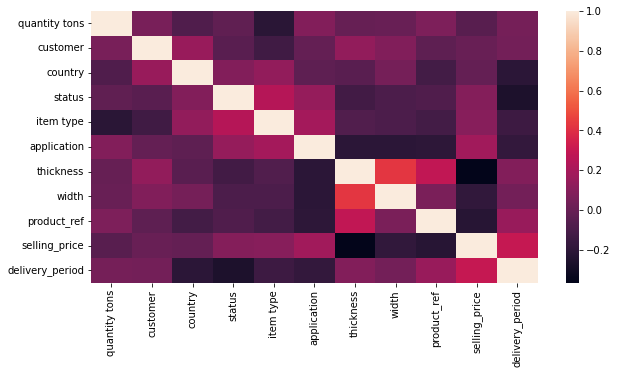

In [96]:
#understanding correlation with feautures and target
plt.figure(figsize =(10,5))
sns.heatmap(df.iloc[:,2: ].corr())
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
x=cdf[['quantity tons','item type','country','application','thickness','width', 'product_ref','selling_price','delivery_period']].values
y=cdf[['status']].values

<AxesSubplot:>

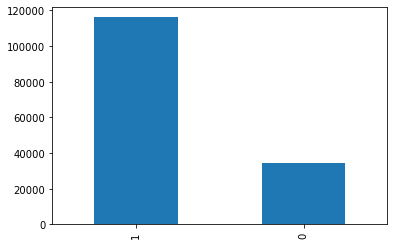

In [98]:
cdf['status'].value_counts().plot(kind='bar')

In [99]:
#Oversampling using smote(Synthetic Minority Over-sampling TEchnique)
#It is a more sophisticated technique than the previous ones. 
#Random sampling is easy, but the new samples don’t add more information to the machine learning algorithms. SMOTE improves on that.

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)


# Standarization categorical  data


In [100]:
# standard scaler -> StandardScaler() - -1 to 1 or MinMaxScaler() - 0 to 1

from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scaler = StandardScaler().fit(x)

#saving pickle file for scaling
pickle.dump(scaler, open('Classification_scaling.pkl', 'wb'))

# transform training data
x = scaler.transform(x)

#spliting train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)

In [101]:
# Empty list to store the Model name s and the Accuracy

C_Models=[]
Accuracy=[]

# Classification model training

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics  import accuracy_score,confusion_matrix, f1_score,roc_auc_score

In [103]:
%%time

#LogisticRegression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Test the LogisticRegression model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(Y_test, Y_pred)
C_Models.append('LogisticRegression')

Accuracy.append(acc)
acc

Wall time: 5.55 s


0.6955519158656954

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 2}

In [105]:
%%time
#KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

# Test the KNeighborsClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(Y_test, Y_pred)
C_Models.append('KNeighborsClassifier')

Accuracy.append(acc)
acc

Wall time: 29 s


0.9282574026981596

In [106]:
%%time
#AdaBoostClassifier model
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, Y_train)

# Test the AdaBoostClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(Y_test, Y_pred)
C_Models.append('AdaBoostClassifier')

Accuracy.append(acc)
acc

Wall time: 1min 30s


0.7892978750915909

In [107]:
%%time
#Decision Tree model
model = DecisionTreeClassifier(max_depth=18)
model.fit(X_train, Y_train)

# Test the Decision Tree model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(Y_test, Y_pred)
C_Models.append('Decision Tree')
Accuracy.append(acc)
acc

Wall time: 5.93 s


0.9372656351019353

In [108]:
%%time
#naive_bayes model
model = GaussianNB()
model.fit(X_train, Y_train)

# Test the naive_bayes model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(Y_test, Y_pred)
C_Models.append('GaussianNB')
Accuracy.append(acc)
acc

Wall time: 352 ms


0.6906814361449938

In [109]:
%%time
#RandomForestClassifier model
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, Y_train)

# Test the RandomForestClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
acc=accuracy_score(Y_test, Y_pred)
C_Models.append('RandomForestClassifier')
Accuracy.append(acc)
acc

Wall time: 23.6 s


0.9642256799275893

In [110]:
Accuracy

[0.6955519158656954,
 0.9282574026981596,
 0.7892978750915909,
 0.9372656351019353,
 0.6906814361449938,
 0.9642256799275893]

# Visualzing the Accuracy scores

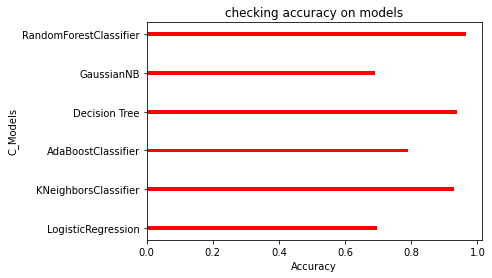

In [111]:
plt.barh(C_Models, Accuracy,
        height = 0.1, color = "red")
 
plt.xlabel("Accuracy")
plt.ylabel("C_Models")
plt.title("checking accuracy on models")
plt.show()

# Observation

From this dataset, " RandomForestClassifier "  model gives the best accuracy, hence considering it as the best-performing model

In [112]:
#creating pickle files to save the trained models in a file

#RandomForestClassifier model
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, Y_train)

pickle.dump(model, open('Classification_model.pkl', 'wb'))

In [113]:
#metrics
Y_pred=model.predict(X_test)

print('confusion_matrix\n',confusion_matrix(Y_test, Y_pred))
print('\n')
print('accuracy_score',accuracy_score(Y_test, Y_pred))
print('\n')
print('f1_score',f1_score(Y_test, Y_pred))
print('\n')
print('roc_auc_score',roc_auc_score(Y_test, Y_pred))

confusion_matrix
 [[22652   571]
 [  896 22283]]


accuracy_score 0.9683849834058876


f1_score 0.9681315577954945


roc_auc_score 0.9683783135273816
